In [1]:
import numpy as np

In [2]:
# Configure the data generation process and train the autoencoder

def gen(n = 400):
    
    x = np.zeros((n, 4))
    
    for i in range(n):
        
        if np.random.uniform() < 0.5:
            x[i, 0] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        if np.random.uniform() < 0.5:
            x[i, 1] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        x[i, 2] = np.random.normal(loc = 0.0, scale = 0.5)
        
        x[i, 3] = x[i, 0] + np.random.normal(loc = 0.0, scale = 0.05)
        
    return x

x = gen()

In [3]:
from Model import *
model = Model.Initialize('autoencoder', x, pretrained_path='./Models/best.pt')

Loading the pretrained model...


In [4]:
from sklearn.cluster import KMeans
num_clusters = 4

rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(rep)

In [5]:
from eldr.plotter.myplot import *

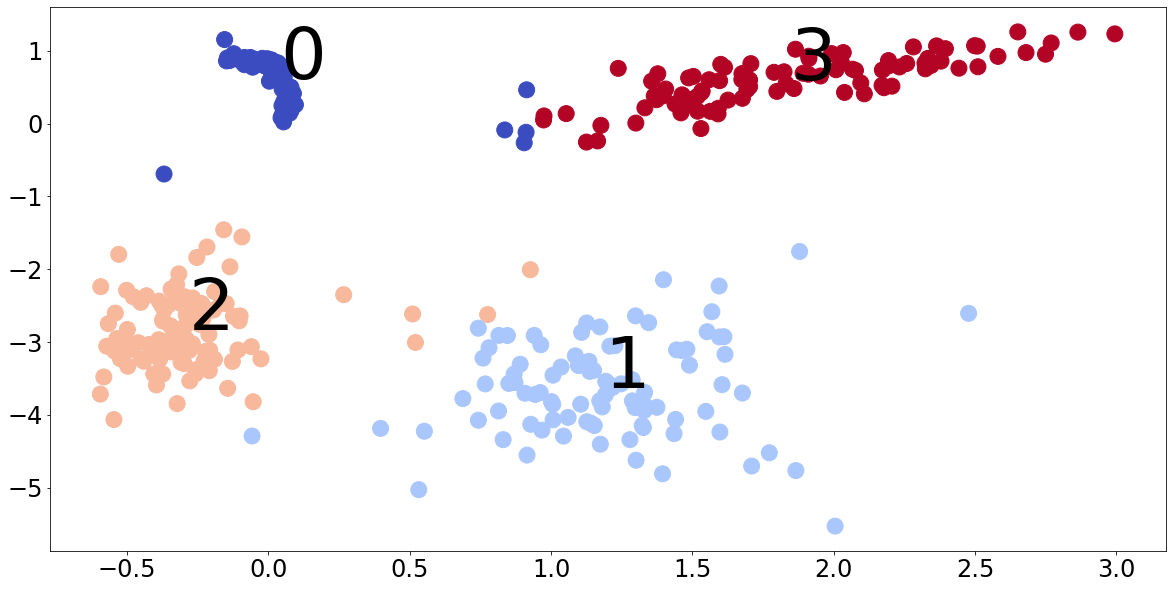

In [6]:
means, centers, indices = plot_groups(x, rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

In [7]:
from eldr.explain.

In [11]:
# Set epsilon for our metrics
epsilon = 0.5

if True:
    metrics.eval_epsilon(model, torch.tensor(x), indices, epsilon)

In [ ]:
import os
best_val = 0.0
ntrials = 10
lg = 1.5
for i in range(ntrials):
    print("Trial: ", i)
    deltas, tgt = explain(model, means, centers, learning_rate = 0.01, consecutive_steps = 5, init_mode='mean', lambda_global = lg)
    print("Deltas: ", deltas)
    a, b = metrics(model, torch.tensor(x), indices, deltas, epsilon)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        np.save("deltas.npy", deltas)
    
    os.system("rm -rf explanation")